In [1]:
import cirq, sympy, warnings
from scipy.optimize import *
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt

In [3]:
warnings.filterwarnings("ignore", message = ".*information \(.*")

### Cost matrices

In [4]:
def create_cost_matrix(n_towns):
   """Рандомная матрица с положительными элементами, 
   которая хранит длины рёбер между каждой парой городов"""

   A = np.random.random((n_towns, n_towns))
   
   for i in range(n_towns):
     A[i][i] = np.nan

   return A

In [5]:
cost_matrix_3 = np.array([[np.nan    , 0.84373847, 0.43912103],
                          [0.33304242, np.nan    , 0.75192627],
                          [0.69582791, 0.96972844, np.nan    ]])

In [6]:
cost_matrix_4 = np.array([[np.nan    , 0.35271991, 0.96262685, 0.11727604],
                          [0.13505078, np.nan    , 0.63915344, 0.43149425],
                          [0.58432224, 0.83676812, np.nan    , 0.4879146 ],
                          [0.14998587, 0.45394107, 0.2140258 , np.nan    ]])

In [7]:
cost_matrix_5 = \
np.array([[np.nan    , 0.33401903, 0.18976653, 0.57694655, 0.11001075],
          [0.68260228, np.nan    , 0.23440849, 0.63405642, 0.05852297],
          [0.79378125, 0.84210502, np.nan    , 0.17264401, 0.74223499],
          [0.5569718 , 0.55289136, 0.53119631, np.nan    , 0.08094091],
          [0.08584468, 0.61697247, 0.69688509, 0.29508331, np.nan    ]])

In [8]:
cost_matrix_6 = \
np.array([[    np.nan, 0.00165482, 0.72520661, 0.4163876 , 0.03288493, 0.54206491],
          [0.74621655,     np.nan, 0.37808992, 0.95303594, 0.17005047, 0.61706156],
          [0.01730168, 0.42465019,     np.nan, 0.34035056, 0.9397413 , 0.06493504],
          [0.2761505 , 0.66518233, 0.42480788,     np.nan, 0.11856712, 0.34309329],
          [0.82796128, 0.86227791, 0.29369849, 0.0604712 ,     np.nan, 0.54814749],
          [0.56525883, 0.63791584, 0.29638851, 0.85863453, 0.75516877,     np.nan]])

In [9]:
cost_matrix_8 = np.array([[       np.nan, 0.83911204, 0.7035106 , 0.39668363, 0.46117354,
        0.19510413, 0.48658963, 0.46131103],
       [0.5870892 ,        np.nan, 0.54862795, 0.74507107, 0.49289714,
        0.47200892, 0.57741251, 0.62507757],
       [0.46634288, 0.91587751,        np.nan, 0.35612168, 0.42860855,
        0.12815892, 0.89677141, 0.85594071],
       [0.53797555, 0.4979348 , 0.97516805,        np.nan, 0.01425964,
        0.21532494, 0.3322861 , 0.0289443 ],
       [0.22634373, 0.62941811, 0.33450535, 0.86398671,        np.nan,
        0.50767408, 0.72648152, 0.99268613],
       [0.41810008, 0.98537316, 0.81336165, 0.06436564, 0.58484745,
               np.nan, 0.12191475, 0.81467971],
       [0.94842273, 0.44981522, 0.93452495, 0.89825261, 0.36265244,
        0.36477084,        np.nan, 0.26013962],
       [0.01901475, 0.50642185, 0.91862145, 0.26389184, 0.29948766,
        0.01025452, 0.32753958,        np.nan]])

In [10]:
cost_matrix_10 = np.array([
    [       np.nan, 0.07942641, 0.99031838, 0.09895247, 0.72745531,
        0.81045902, 0.15923533, 0.61330537, 0.90258873, 0.15491793],
       [0.88407753,     np.nan, 0.06199901, 0.56877632, 0.70008972,
        0.81340743, 0.84484164, 0.92044895, 0.59612563, 0.45129374],
       [0.50613502, 0.10989179,     np.nan, 0.73065915, 0.85902533,
        0.27992034, 0.22580289, 0.40041954, 0.66807122, 0.89457109],
       [0.80156922, 0.67934361, 0.44204649,     np.nan, 0.16947546,
        0.29116308, 0.84592144, 0.96306772, 0.98000683, 0.67636839],
       [0.6794687 , 0.15517822, 0.70378366, 0.06865874,     np.nan,
        0.41927295, 0.3731578 , 0.69591233, 0.64424128, 0.04614225],
       [0.05896441, 0.85363734, 0.40025621, 0.13863461, 0.29386601,
            np.nan, 0.60606968, 0.40311522, 0.32417107, 0.3095105 ],
       [0.26764498, 0.99628721, 0.76874766, 0.44323412, 0.34564126,
        0.46406834,     np.nan, 0.18756799, 0.11153533, 0.27771632],
       [0.85918156, 0.4737215 , 0.47637782, 0.47882724, 0.45202033,
        0.40306174, 0.69005201,     np.nan, 0.09939983, 0.05238272],
       [0.4481055 , 0.89202079, 0.18795216, 0.47662974, 0.5363038 ,
        0.00846634, 0.98229673, 0.57620242,     np.nan, 0.80506734],
       [0.38888649, 0.25867673, 0.69360475, 0.56495989, 0.39199138,
        0.27841065, 0.12511922, 0.95978543, 0.44909675,     np.nan]])

In [11]:
def cost_of_permutation(cost_matrix, town_sequence):
  cost = 0.0

  for i in range(len(town_sequence)-1):
    cost += cost_matrix [town_sequence[i]] [town_sequence[i+1]]
  
  return cost

### Аналитическое решение

Переберём все перестановки в лексикографическом порядке.

Будем итерироваться по номеру перестановки. Сначала переведём его в факториальную систему счисления [(factoradic)](https://en.wikipedia.org/wiki/Factorial_number_system). Полученные цифры будут совпадать с [кодом Лемера](https://en.wikipedia.org/wiki/Lehmer_code) перестановки. 

Затем по коду Лемера вычислим саму перестановку и затем её стоимость.

In [12]:
# Для перевода из десятичной системы счисления в факториальную 
# понадобятся факториалы, поэтому вычислим их заранее:
#
# factorials[n] == n!

factorials = [1]
for i in range(30):
  # Предполагаю, что n_towns < 30
  factorials.append(factorials[i] * (i+1))

In [13]:
def factoradic_from_perm_number(perm_number : int, factoradic_array):
  """Преобразует число в факториальную систему счисления.
  Записывает полученные цифры в factoradic_array.
  Нулевая цифра в массиве - самая значимая. Последняя цифра всегда равна 0.
  Алгоритм из https://en.wikipedia.org/wiki/Factorial_number_system#Definition """

  N = perm_number
  n_towns = len(factoradic_array)
  assert N < factorials[n_towns]

  for i in range(1, len(factoradic_array) + 1):
    N, factoradic_array[-i] = divmod(N, i)
  
  return factoradic_array

In [14]:
def permutation_from_factoradic(nums : np.ndarray):
  """Перезаписывает массив nums.
  Если изначально там находилось число в факториальной системе, то потом там будет находиться перестановка.
  Города в полученной перестановке нумеруются с 0. 
  Алгоритм из https://en.wikipedia.org/wiki/Lehmer_code#Encoding_and_decoding """
  for i in range(len(nums)-2, -1, -1):
    for j in range(i+1, len(nums)):
      if(nums[j] >= nums[i]):
        nums[j] += 1
  return nums

In [15]:
def analytical(cost_matrix):

  n_towns = len(cost_matrix)

  factoradic_array = np.ndarray(n_towns, int)

  answers_array = []

  min_cost = np.inf
  opt_perm_number = np.nan

  for perm_number in range(factorials[n_towns]):
    town_sequence = permutation_from_factoradic(
                        factoradic_from_perm_number(perm_number, factoradic_array)
                    )
    cost = cost_of_permutation(
        cost_matrix,
        town_sequence
        )

    answers_array.append(cost)

    if cost < min_cost:
      min_cost = cost
      opt_perm_number = perm_number

  return {"opt_perm_number": opt_perm_number,
          "answers_table": pd.DataFrame(answers_array, columns = ["cost"])}

In [16]:
anal4 = analytical(cost_matrix_4)
anal4['answers_table'].loc[[anal4['opt_perm_number']]]
# = Оптимальный путь:

,cost
7,0.466353


### Самая простая цепь

In [344]:
def rotosolve(f, x0, tol = 1e-3, max_iter = 150, verbose = False, abs = True):
    """Находит минимум функции f с помощью алгоритма Rotosolve.

    Args:

        x0  - начальная точка, можно взять рандомную

        tol - итерации прекращаются, если улучшение за один цикл обновления вектора X составило меньше tol

        abs - если True, то с величиной tol сравнивается не улучшение f, а его модуль

        max_iter - максимальное число циклов обновления вектора x

        verbose - если True, то сохранять историю значений f

    Returns:

        x, fun - точка минимума и его значение

        num_iterations - число циклов обновления вектора x

        nfev - число вычислений функции, оно равно 3 * len(x0) * num_iterations

        cost_history - Python array
    """

    position = x0
    nfev = 0
    num_iterations = 0
    previous_cost = np.nan
    current_cost = f(x0)

    if verbose:
        cost_history = [current_cost]
    else:
        cost_history = []

    while num_iterations < max_iter:
        if abs:
            if np.abs(previous_cost - current_cost) < tol:
                break
        else:
            if previous_cost - current_cost < tol:
                break
        
        previous_cost = current_cost
        for i, theta in enumerate(position):

            position[i] = theta + np.pi / 2
            cost_p = f(position)

            position[i] = theta - np.pi / 2
            cost_m = f(position)

            atan = np.arctan2(2 * current_cost - cost_p - cost_m,
                              cost_p - cost_m)
            position[i] = theta - np.pi / 2 - atan % (2 * np.pi)

            current_cost = f(position)
            if verbose:
                cost_history.append(current_cost)

            nfev += 3
        num_iterations += 1

    return {'fun': current_cost,
       'position': position,
 'num_iterations': num_iterations,
           'nfev': nfev,
   'cost_history': cost_history}


In [318]:
coefs = np.random.random(10)
coefs

array([0.06538229, 0.4394918 , 0.35207897, 0.9429558 , 0.00260718,
       0.13132172, 0.46514459, 0.23811624, 0.41192233, 0.22373748])

In [319]:
f = lambda x : np.sum(np.sin(x) * coefs)

In [320]:
rotosolve(f, 2 * np.pi * np.random.random(10))

{'fun': -3.2727583935688633,
 'position': array([ 4.71238898,  4.71238898,  4.71238898,  4.71238898, -1.57079633,
         4.71238898, -1.57079633,  4.71238898,  4.71238898, -1.57079633]),
 'num_iterations': 2,
 'nfev': 60,
 'cost_history': []}

In [321]:
-np.sum(coefs)

-3.2727583935688633

In [332]:
class RxCircuit:

   def __init__(self, n_towns):
      n_qubits = int(np.ceil(np.log2(factorials[n_towns])))

      self.qubits = cirq.LineQubit.range(n_qubits)
      self.circuit = cirq.Circuit()
      self.simulator = cirq.Simulator()

      self._town_sequence = np.ndarray(n_towns, int)
      self.n_towns = n_towns

      self._angle_names = [f'a_{i}' for i in range(n_qubits)]
      angle_symbols = sympy.symbols(self._angle_names)
      self._grad = np.ndarray(len(angle_symbols))
      self._hess = np.ndarray((len(angle_symbols), len(angle_symbols)))

    # Параметрические гейты
      rx_gates = [cirq.rx(angle)(qubit)
                  for (angle, qubit)
                  in zip(angle_symbols, self.qubits)]

      self.circuit.append(rx_gates)
      
      measurements = cirq.measure_each(*self.qubits)
      self.circuit.append(cirq.Moment(measurements))


   def measure(self, angles, repetitions = 1):

      params = cirq.ParamResolver({
         name: value for (name, value) in
         zip(self._angle_names, angles)
      })

      return self.simulator.run(self.circuit, params, repetitions)


   def cost_of_bits(self, bits, cost_matrix):
      "Вычисляет по последовательности битов перестановку и её стоимость"
      return cost_of_permutation(
          cost_matrix,
          permutation_from_factoradic(
              factoradic_from_perm_number(
                  cirq.big_endian_bits_to_int(bits) % factorials[self.n_towns],
                  self._town_sequence
              )
          )
      )


   def costs(self, angles, cost_matrix, repetitions):
      "Повторяет измерения и каждый раз вычисляет кост"

      measurementDataFrame = self.measure(angles, repetitions).data

      return measurementDataFrame.apply(
          self.cost_of_bits, 
          axis = 1, raw = True, args = (cost_matrix,)
          )
   
   def cost_derivative(self, angles, cost_matrix, repetitions = 100):
      "Сэмплирует и вычисляет производную в соответствии с Parameter Shift Rule"

      for i, theta in enumerate(angles):

         angles[i] = theta + np.pi / 2
         cost_plus = self.costs(angles, cost_matrix, repetitions).mean()

         angles[i] = theta - np.pi / 2
         cost_minus = self.costs(angles, cost_matrix, repetitions).mean()

         self._grad[i] = (cost_plus - cost_minus) / 2
         angles[i] = theta
      
      return self._grad

   def cost_hess(self, angles, cost_matrix, repetitions = 100):
      for i, theta_i in enumerate(angles):
         for j, theta_j in enumerate(angles[:i+1]):
            angles[i] = theta_i + np.pi / 2
            angles[j] = theta_j + np.pi / 2
            cpp = self.costs(angles, cost_matrix, repetitions).mean()

            angles[j] = theta_j - np.pi / 2
            cpm = self.costs(angles, cost_matrix, repetitions).mean()

            angles[i] = theta_i - np.pi / 2
            cmm = self.costs(angles, cost_matrix, repetitions).mean()

            angles[j] = theta_j + np.pi / 2
            cmp = self.costs(angles, cost_matrix, repetitions).mean()

            self._hess[i][j] = self._hess[j][i] = (cpp - cpm - cmp + cmm) / 4

            angles[i] = theta_i
            angles[j] = theta_j
            
      return self._hess


   def optimize(self, cost_matrix, 
               optimizer = rotosolve,
               repetitions = 200,
               **optimizer_kwargs):
      """
      Вызывает функцию, заданную в аргументе optimizer.
      С её помощью подбирает параметры гейтов так,
      чтобы решить задачу коммивояжёра.
      Маршрут вычисляется на основе результатов измерений снова и снова,
      а затем суммарная длина пути усредняется. 
      Именно эту усреднённую длину пути мы пытаемся минимизировать.

      Args:

       cost_matrix - матрица размером n_towns × n_towns такая, что
                     cost_matrix[i][j] есть длина пути между городами i и j

       optimizer - одна из функций https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization

       repetitions - число повторений для усреднения коста. 
                     Для градиентных методов нужна высокая точность, 
                     так как они считают разность между близкими величинами.
                     Могут потребоваться миллионы повторений.
      """

      cost_lambda = lambda angles : self.costs(angles, cost_matrix, repetitions).mean()
      jac_lambda  = lambda angles : self.cost_derivative(angles, cost_matrix, repetitions)
      hess_lambda = lambda angles : self.cost_hess(angles, cost_matrix, repetitions)
      

      if 'jac' in optimizer.__code__.co_varnames:
         optimizer_kwargs['jac'] = jac_lambda

      if 'hess' in optimizer.__code__.co_varnames:
         optimizer_kwargs['hess'] = hess_lambda

      if optimizer == basinhopping or optimizer == minimize or optimizer == rotosolve:
         if 'x0' not in optimizer_kwargs:
            optimizer_kwargs['x0'] = [2 * np.pi * (np.random.random() - 0.5)
                                    for _ in self._angle_names]
      else:
         if 'bounds' not in optimizer_kwargs:
            if optimizer == shgo:
               optimizer_kwargs['bounds'] = [(None, None) for _ in self._angle_names]
            else:
               optimizer_kwargs['bounds'] = [(-np.pi, np.pi) for _ in self._angle_names]

      return optimizer(cost_lambda, **optimizer_kwargs)


   def __str__(self):
      return self.circuit.__str__()

   def _repr_pretty_(self, *args):
      "Text output in Jupyter"
      return self.circuit._repr_pretty_(*args)

In [70]:
RxCircuit(4).optimize_scipy(cost_matrix_4, minimize)

      fun: 1.0940599129
 hess_inv: array([[ 1.13268544, -0.39796919, -0.45698471, -0.45560363,  0.42593534],
       [-0.39796919,  0.64962874,  0.27226756,  0.19299317, -0.17177775],
       [-0.45698471,  0.27226756,  1.27813525,  0.8076843 , -0.41695177],
       [-0.45560363,  0.19299317,  0.8076843 ,  8.32333837, -3.78677595],
       [ 0.42593534, -0.17177775, -0.41695177, -3.78677595,  2.89409727]])
      jac: array([ 0.00306589,  0.0433124 ,  0.02399302,  0.03743283, -0.02830287])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 44
      nit: 5
     njev: 28
   status: 2
  success: False
        x: array([-0.04241957,  3.26297821,  3.26911605, -2.82835193, -0.21063349])

In [69]:
RxCircuit(4).optimize_scipy(cost_matrix_4, minimize, method = 'CG')

     fun: 0.4663526200000001
     jac: array([ 0.05235426, -0.00359746,  0.00719065, -0.03157728,  0.01678859])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 25
     nit: 7
    njev: 25
  status: 2
 success: False
       x: array([-3.06934465,  3.0823603 , -3.13712467,  3.05788422, -3.18101748])

In [80]:
res = RxCircuit(4).optimize_scipy(cost_matrix_4, minimize, method = 'CG', options = {'disp': True})
res

         Current function value: 0.466353
         Iterations: 6
         Function evaluations: 42
         Gradient evaluations: 30


     fun: 0.4663526200000001
     jac: array([-0.00342358, -0.03331635,  0.0110121 , -0.01745406, -0.04476958])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 42
     nit: 6
    njev: 30
  status: 2
 success: False
       x: array([ 0.06265607, -0.04758915, -3.06400814,  3.18033476,  3.10562776])

### Схема с двумя слоями Rx и CNOT

In [333]:
class RxCNOTCircuit(RxCircuit):
   def __init__(self, n_towns, n_layer_pairs):
      n_qubits = int(np.ceil(np.log2(factorials[n_towns])))

      self.qubits = cirq.LineQubit.range(n_qubits)
      self.circuit = cirq.Circuit()
      self.simulator = cirq.Simulator()

      self._town_sequence = np.ndarray(n_towns, int)
      self.n_towns = n_towns

      self._angle_names = [f'a_{i}' for i in range(n_layer_pairs * n_qubits)]
      angle_symbols = sympy.symbols(self._angle_names)
      self._grad = np.ndarray(len(angle_symbols))
      self._hess = np.ndarray((len(angle_symbols), len(angle_symbols)))

      # Параметрические гейты
      for layer_pair in range(n_layer_pairs):
          rx_gates = [cirq.rx(angle)(qubit)
                      for (angle, qubit)
                      in zip(
                        angle_symbols[layer_pair*n_qubits : (layer_pair+1)*n_qubits],
                        self.qubits) 
                    ]
          self.circuit.append(cirq.Moment(rx_gates))

          cnot_gates = [cirq.CNOT(q1, q2)
                        for (q1, q2)
                        in zip(self.qubits, self.qubits[1:]) ]
          self.circuit.append(cnot_gates)

      # Измерения
      measurements = cirq.measure_each(*self.qubits)
      self.circuit.append(cirq.Moment(measurements))

In [75]:
RxCNOTCircuit(4, 1).optimize_scipy(cost_matrix_4, minimize, method = 'CG')

     fun: 1.4177511215999998
     jac: array([-0.02236597,  0.00032345, -0.00095859,  0.00658881, -0.0444357 ])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 27
     nit: 1
    njev: 15
  status: 2
 success: False
       x: array([ 0.10516607,  3.12365842, -0.04654126, -0.13637913,  0.18886865])

In [78]:
RxCNOTCircuit(4, 1).optimize_scipy(cost_matrix_4, minimize, method = 'CG', repetitions = 1000)

     fun: 0.9992393647799998
     jac: array([-2.44209167e-03, -1.02666127e-02,  8.14008700e-05,  8.76492157e-03,
       -3.29318400e-03])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 66
     nit: 15
    njev: 57
  status: 2
 success: False
       x: array([ 0.02112995,  6.04087835, -0.03261231,  0.02019268, -3.14630333])

### Сравнение методов

In [326]:
def extensively_test_circuit(cost_matrix, circuit, optimizer, iterations = 15, repetitions = 200, **optimizer_kwargs):
  res = []

  for _ in range(iterations):
    res_n = circuit.optimize(cost_matrix, optimizer, repetitions, **optimizer_kwargs)
    res.append((res_n['fun'], res_n['nfev'], res_n.get('njev'), res_n.get('nhev')))

  return pd.DataFrame(res, columns = ["cost", "nfev", "njev", "nhev"]).fillna(0)

#### 4 города

In [159]:
res_CG_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'CG', repetitions = 1000, iterations = 50)
res_CG_4

,cost,nfev,njev,nhev
0,0.466353,37,25,0
1,0.466353,41,29,0
2,1.083269,37,27,0
3,0.466353,27,27,0
4,1.187644,22,12,0
5,1.145160,19,7,0
6,1.078445,35,24,0
7,0.466353,32,20,0
8,0.998240,42,30,0
9,0.466353,31,19,0


In [160]:
res_BFGS_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'BFGS', repetitions = 1000, iterations = 50)
res_BFGS_4

,cost,nfev,njev,nhev
0,0.998240,38,26,0
1,0.466353,31,19,0
2,1.149791,25,14,0
3,1.074484,32,20,0
4,0.466353,27,27,0
5,0.466353,22,22,0
6,0.466353,27,27,0
7,1.088398,59,39,0
8,0.961534,29,17,0
9,0.466353,27,27,0


In [161]:
res_Newton_CG_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'Newton-CG', repetitions = 1000, iterations = 50)
res_Newton_CG_4

,cost,nfev,njev,nhev
0,0.466353,33,21,6
1,0.998240,36,24,13
2,0.466353,30,18,5
3,0.466353,45,33,19
4,0.466353,37,23,5
5,0.466353,27,15,4
6,0.466353,32,20,7
7,0.466353,45,33,12
8,0.466353,41,29,11
9,0.466353,30,18,6


In [162]:
res_L_BFGS_B_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'L-BFGS-B', repetitions = 1000, iterations = 50)
res_L_BFGS_B_4

,cost,nfev,njev,nhev
0,0.466353,28,28,0
1,0.998240,18,18,0
2,0.468485,22,22,0
3,1.076906,28,28,0
4,0.466353,20,20,0
5,0.998827,22,22,0
6,0.467996,25,25,0
7,0.466353,19,19,0
8,0.998240,17,17,0
9,0.466353,17,17,0


In [163]:
res_TNC_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'TNC', repetitions = 1000, iterations = 50)
res_TNC_4

,cost,nfev,njev,nhev
0,1.014636,51,0,0
1,0.965240,29,0,0
2,1.343210,46,0,0
3,1.115506,48,0,0
4,1.312362,35,0,0
5,1.032114,74,0,0
6,1.094283,52,0,0
7,1.234612,19,0,0
8,1.261638,24,0,0
9,1.377158,50,0,0


In [164]:
res_SLSQP_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'SLSQP', repetitions = 1000, iterations = 50)
res_SLSQP_4

,cost,nfev,njev,nhev
0,0.466877,31,18,0
1,1.073941,37,13,0
2,0.466353,23,9,0
3,0.466877,31,15,0
4,0.466353,48,16,0
5,0.466353,23,10,0
6,0.468960,27,11,0
7,0.466353,24,7,0
8,0.466353,19,8,0
9,0.466353,19,7,0


In [165]:
res_dogleg_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'dogleg', repetitions = 1000, iterations = 50)
res_dogleg_4

,cost,nfev,njev,nhev
0,1.291371,1,1,1
1,1.112821,1,1,1
2,1.164518,1,1,1
3,1.331695,1,1,1
4,1.427013,1,1,1
5,1.365358,1,1,1
6,1.142022,1,1,1
7,1.359441,1,1,1
8,1.369668,1,1,1
9,1.412254,1,1,1


In [166]:
res_trust_ncg_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'trust-ncg', repetitions = 1000, iterations = 50)
res_trust_ncg_4

,cost,nfev,njev,nhev
0,0.466353,34,8,8
1,1.229823,31,8,8
2,0.466353,34,7,7
3,0.466353,32,5,5
4,1.013776,61,30,30
5,0.466353,33,6,6
6,0.998240,41,15,15
7,0.466353,36,8,8
8,1.086108,33,8,8
9,0.466353,35,7,7


In [167]:
res_trust_krylov_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'trust-krylov', repetitions = 1000, iterations = 50)
res_trust_krylov_4

,cost,nfev,njev,nhev
0,0.466353,31,31,5
1,1.079123,42,42,14
2,1.082707,35,35,9
3,1.175691,30,30,4
4,0.467401,50,50,20
5,1.003510,41,41,13
6,0.466353,33,33,6
7,0.466353,32,32,5
8,0.466353,33,33,6
9,0.466353,35,35,7


In [168]:
res_trust_exact_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'trust-exact', repetitions = 1000, iterations = 50)
res_trust_exact_4

,cost,nfev,njev,nhev
0,0.466353,54,23,54
1,0.466353,32,5,32
2,1.008649,37,11,37
3,0.466353,35,8,35
4,0.998240,34,8,34
5,0.466353,34,7,34
6,0.466353,34,7,34
7,1.229745,34,8,34
8,0.998393,39,11,39
9,1.229383,31,6,31


In [169]:
res_trust_constr_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'trust-constr', repetitions = 1000, iterations = 50)
res_trust_constr_4

,cost,nfev,njev,nhev
0,0.466353,44,15,15
1,0.466353,32,10,10
2,0.466353,31,10,10
3,0.466353,36,12,12
4,0.466353,29,6,6
5,0.466353,28,12,12
6,0.466353,52,18,18
7,0.466353,36,13,13
8,0.466353,25,5,5
9,1.150378,31,10,10


In [125]:
res_cobyla_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), minimize, method = 'cobyla', repetitions = 1000)
res_cobyla_4

,cost,nfev,njev,nhev
0,1.079762,51,0,0
1,1.072414,64,0,0
2,1.172004,53,0,0
3,0.958655,82,0,0
4,0.477689,82,0,0
5,1.029659,78,0,0
6,0.466353,76,0,0
7,0.467472,60,0,0
8,0.473096,68,0,0
9,0.467366,64,0,0


In [133]:
res_shgo_4 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 1), shgo, repetitions = 1000, sampling_method='sobol')
res_shgo_4

,cost,nfev,njev,nhev
0,0.716419,140,0,0
1,0.722815,140,0,0
2,0.720497,140,0,0
3,0.758615,140,0,0
4,0.718214,140,0,0
5,0.714130,140,0,0
6,0.703290,140,0,0
7,0.742777,140,0,0
8,0.708438,140,0,0
9,0.750987,140,0,0


In [134]:
res_shgo_4_2 = extensively_test_circuit(cost_matrix_4, RxCNOTCircuit(4, 2), shgo, repetitions = 1000, sampling_method='sobol')
res_shgo_4_2

,cost,nfev,njev,nhev
0,0.998246,139,0,0
1,0.990483,139,0,0
2,1.014679,139,0,0
3,0.978390,139,0,0
4,0.968376,139,0,0
5,0.998446,139,0,0
6,0.996746,139,0,0
7,0.987645,139,0,0
8,1.006181,139,0,0
9,0.977878,139,0,0


In [156]:
res_roto_4_

,cost,num_iterations
0,0.466353,4
1,0.466353,2
2,0.473793,4
3,0.471420,6
4,0.466353,2
5,0.998240,5
6,0.998240,2
7,0.466353,3
8,0.466353,4
9,0.466353,2


In [157]:
res_roto_4 = pd.DataFrame({'cost': res_roto_4_['cost'], 'nfev': res_roto_4_['num_iterations'] * 3 * 5})
res_roto_4

,cost,nfev
0,0.466353,60
1,0.466353,30
2,0.473793,60
3,0.471420,90
4,0.466353,30
5,0.998240,75
6,0.998240,30
7,0.466353,45
8,0.466353,60
9,0.466353,30


In [174]:
four_towns = pd.DataFrame([
    res_CG_4.mean(),
    res_BFGS_4.mean(),
    res_Newton_CG_4.mean(),
    res_L_BFGS_B_4.mean(),
    res_TNC_4.mean(),
    res_SLSQP_4.mean(),
    res_dogleg_4.mean(),
    res_trust_ncg_4.mean(),
    res_trust_krylov_4.mean(),
    res_trust_exact_4.mean(),
    res_trust_constr_4.mean(),
    res_cobyla_4.mean(),
    res_shgo_4.mean(),
    res_roto_4.mean(),
]).fillna(0)
four_towns['algorithm'] = [
    "CG",
    "BFGS",
    "Newton_CG",
    "L_BFGS_B",
    "TNC",
    "SLSQP",
    "dogleg",
    "trust_ncg",
    "trust_krylov",
    "trust_exact",
    "trust_constr",
    "cobyla",
    "trust_shgo",
    "rotosolve"
]
four_towns.sort_values('cost')

,cost,nfev,njev,nhev,algorithm
13,0.538955,54.000000,0.00,0.00,rotosolve
2,0.583699,33.560000,21.80,8.54,Newton_CG
10,0.585618,32.120000,10.10,10.10,trust_constr
7,0.626505,36.560000,9.36,9.36,trust_ncg
8,0.673291,35.560000,35.56,8.34,trust_krylov
5,0.689324,25.480000,11.16,0.00,SLSQP
9,0.704802,36.800000,9.68,36.80,trust_exact
3,0.716617,22.500000,22.50,0.00,L_BFGS_B
12,0.722228,140.000000,0.00,0.00,trust_shgo
1,0.726280,34.960000,27.64,0.00,BFGS


#### 8 городов

In [180]:
anal8 = analytical(cost_matrix_8)
anal8['answers_table'].iloc[[anal8['opt_perm_number']]]

,cost
35577,1.464352


In [182]:
# 10 min
res_Newton_CG_8 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 1), minimize, method = 'Newton-CG')
res_Newton_CG_8

,cost,nfev,njev,nhev
0,3.595450,7,7,2
1,2.632648,39,27,14
2,1.517701,27,15,8
3,2.669714,26,14,7
4,2.876562,23,23,9
5,2.798086,27,15,8
6,1.963658,29,17,7
7,2.279863,40,20,9
8,2.420475,19,18,7
9,3.410232,19,7,1


In [197]:
res_trust_constr_8 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 1), minimize, method = 'trust-constr')
res_trust_constr_8

,cost,nfev,njev,nhev
0,1.731150,31,13,13
1,2.407199,33,14,14
2,2.216607,26,11,11
3,2.443147,25,8,8
4,2.166713,32,14,14
5,2.078965,35,14,14
6,2.014297,30,12,12
7,1.841786,25,8,8
8,1.472508,27,10,10
9,2.392887,32,13,13


In [186]:
from io import StringIO

In [191]:
res_roto_8_ = pd.read_csv(StringIO("""cost	num_iterations
0	2.062207	21
1	2.065208	16
2	1.662565	26
3	2.266169	50
4	2.422025	35
5	2.199769	39
6	1.761377	49
7	1.814616	10
8	1.743858	50
9	1.683705	25
10	2.215463	50
11	2.123459	50
12	1.677732	24
13	1.766979	50
14	2.220943	43
0	1.766862	16
1	1.654859	27
2	2.252947	4
3	1.618527	17
4	1.739651	21
5	1.738833	24
6	1.704858	16
7	1.654859	3
8	1.911587	6
9	2.013022	50
10	2.104936	9
11	1.683179	50
12	1.842044	18
13	2.061640	28
14	1.569353	50
"""), sep = '\t')

In [193]:
res_roto_8 = pd.DataFrame({'cost': res_roto_8_['cost'], 'nfev': res_roto_8_['num_iterations'] * 3 * 16})

In [348]:
# 4 min
res_roto_8_my = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 1), rotosolve, iterations = 30)
res_roto_8_my

,cost,nfev,njev,nhev
0,2.081049,528,0,0
1,1.854007,240,0,0
2,1.976169,192,0,0
3,2.114417,960,0,0
4,1.890126,912,0,0
5,1.677731,480,0,0
6,2.200843,576,0,0
7,1.776544,768,0,0
8,1.710832,1056,0,0
9,1.820735,288,0,0


In [272]:
res_roto_8_low_it = extensively_test_circuit(
    cost_matrix_8, RxCNOTCircuit(8, 1), rotosolve,
    iterations = 30, repetitions = 50, tolerance = 1e-3
)

In [343]:
eight_towns = pd.DataFrame([
    res_Newton_CG_8.mean(),
    res_roto_8.mean(),
    res_trust_constr_8.mean(),
    res_roto_8_my.mean(),
    res_roto_8_low_it.mean()
]).fillna(0)
eight_towns['algorithm'] = [
    "Newton_CG",
    "rotosolve",
    "trust_constr",
    "rotosolve_my",
    "rotosolve_50_it"
]
eight_towns['nfev_total'] = eight_towns['nfev'] + 16 * eight_towns['njev'] + (16**2) * eight_towns['nhev']
eight_towns[['algorithm', 'cost', 'nfev_total']].sort_values('cost')

,algorithm,cost,nfev_total
3,rotosolve_my,1.882417,3115.200000
1,rotosolve,1.900108,1403.200000
2,trust_constr,2.121218,3458.200000
4,rotosolve_50_it,2.302172,225.600000
0,Newton_CG,2.453253,2656.266667


In [314]:
res_roto_8_['num_iterations'].mean()

29.233333333333334

In [224]:
roto8 = RxCNOTCircuit(8, 1).optimize(cost_matrix_8, rotosolve, verbose = True, repetitions = 2000)
roto8['fun'], roto8['nfev']

(1.7302858982399993, 192)

In [264]:
roto8['num_iterations'], roto8['nfev'], roto8['num_iterations']*16*3

(4, 192, 192)

In [245]:
replist = [50, 100, 320, 1000, 2250, 5000, 10000]

In [246]:
roto88 = [RxCNOTCircuit(8, 1).optimize(cost_matrix_8, verbose = True, repetitions = r)
for r in replist]

In [247]:
roto88histories = [res['cost_history'] for res in roto88]
roto88df = pd.DataFrame(roto88histories, index = replist).transpose()

In [250]:
px.line(roto88df, template = 'plotly_dark')

In [251]:
roto88_2 = [RxCNOTCircuit(8, 1).optimize(cost_matrix_8, verbose = True, repetitions = r, tolerance = 1e-3)
for r in replist]

In [256]:
roto88histories_2 = [res['cost_history'] for res in roto88_2]
roto88df_2 = pd.DataFrame(roto88histories_2, index = replist).transpose()

In [257]:
px.line(roto88df_2, template = 'plotly_dark')

In [269]:
RxCNOTCircuit(8, 1).costs(
    roto88_2[0]['position'],
    cost_matrix_8,
    15
)

0     1.966884
1     1.719144
2     1.908488
3     1.719144
4     2.879906
5     2.737242
6     1.719144
7     2.135974
8     1.719144
9     1.966884
10    1.719144
11    1.719144
12    1.719144
13    1.719144
14    1.719144
dtype: float64

In [284]:
#43 sec, bad
res_rx_cnot_8_2 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, iterations = 10, max_iterations = 150, tolerance = 1e-3)
res_rx_cnot_8_2

,cost,nfev,njev,nhev
0,3.523671,288,0,0
1,3.638718,96,0,0
2,3.604286,288,0,0
3,3.586951,192,0,0
4,3.431801,384,0,0
5,3.529495,288,0,0
6,3.662314,96,0,0
7,3.444320,288,0,0
8,3.621244,288,0,0
9,3.227190,672,0,0


In [322]:
#50 sec, bad
res_rx_cnot_8_2_small_tol = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, iterations = 10, max_iterations = 150)
res_rx_cnot_8_2_small_tol

,cost,nfev,njev,nhev
0,3.370132,288,0,0
1,1.716152,768,0,0
2,1.829919,672,0,0
3,1.980946,672,0,0
4,3.507642,288,0,0
5,3.529229,96,0,0
6,3.544184,192,0,0
7,3.603797,96,0,0
8,3.608888,384,0,0
9,3.468542,96,0,0


In [286]:
roto88_twice = [RxCNOTCircuit(8, 2).optimize(cost_matrix_8, verbose = True, tolerance = 1e-3)
for _ in range(6)]

In [289]:
roto88twice_histories = [res['cost_history'] for res in roto88_twice]
roto88twice_df = pd.DataFrame(roto88twice_histories).transpose()

In [290]:
px.line(roto88twice_df, template = 'plotly_dark')

In [291]:
roto88_twice = [RxCNOTCircuit(8, 2).optimize(cost_matrix_8, verbose = True, tolerance = 1e-3, repetitions = 1000)
for _ in range(6)]

In [292]:
roto88twice_histories = [res['cost_history'] for res in roto88_twice]
roto88twice_df = pd.DataFrame(roto88twice_histories).transpose()

In [293]:
px.line(roto88twice_df, template = 'plotly_dark')

In [307]:
res_roto_8_1000 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, iterations = 30, repetitions = 1000, tolerance = 1e-3, max_iterations = 150)
res_roto_8_1000

,cost,nfev,njev,nhev
0,1.678557,480,0,0
1,1.695721,480,0,0
2,1.697370,384,0,0
3,2.580978,480,0,0
4,1.685385,384,0,0
5,1.681544,480,0,0
6,1.646511,576,0,0
7,2.288802,672,0,0
8,1.685301,576,0,0
9,1.817439,672,0,0


In [327]:
res_roto_8_200 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, iterations = 30,max_iterations = 150)
res_roto_8_200

,cost,nfev,njev,nhev
0,1.729810,480,0,0
1,3.552237,96,0,0
2,1.943807,672,0,0
3,1.707802,672,0,0
4,1.669507,768,0,0
5,2.048478,672,0,0
6,3.447976,192,0,0
7,1.753161,576,0,0
8,3.637872,96,0,0
9,3.576353,96,0,0


In [338]:
# 172 min = 3 h
res_roto_8_mod = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, iterations = 30,max_iterations = 150)
res_roto_8_mod

,cost,nfev,njev,nhev
0,2.202329,14496,0,0
1,1.971923,14496,0,0
2,1.717177,14496,0,0
3,1.749953,14496,0,0
4,1.846832,14496,0,0
5,1.630394,14496,0,0
6,1.638849,14496,0,0
7,1.709827,14496,0,0
8,1.650071,14496,0,0
9,1.685755,14496,0,0


In [345]:
f8 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 1), rotosolve, 50, abs = False)
f8

,cost,nfev,njev,nhev
0,1.707973,288,0,0
1,1.743147,192,0,0
2,1.682253,240,0,0
3,1.769037,192,0,0
4,1.721284,336,0,0
5,2.090317,240,0,0
6,2.006346,240,0,0
7,1.978526,336,0,0
8,1.856963,288,0,0
9,1.693017,336,0,0


In [347]:
# 7 min
f8_2 = extensively_test_circuit(cost_matrix_8, RxCNOTCircuit(8, 2), rotosolve, 50, abs = False)
f8_2

,cost,nfev,njev,nhev
0,2.005000,960,0,0
1,3.444637,384,0,0
2,3.531042,192,0,0
3,2.170166,576,0,0
4,1.713038,672,0,0
5,1.585456,960,0,0
6,1.780283,768,0,0
7,3.574171,480,0,0
8,1.734872,960,0,0
9,1.848676,672,0,0


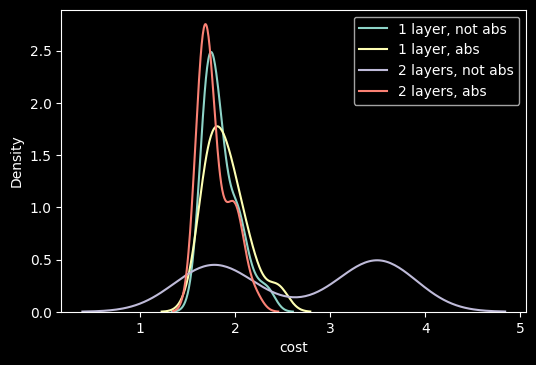

In [351]:
plt.figure(dpi = 100)
sns.kdeplot(f8['cost'], label = '1 layer, not abs')
sns.kdeplot(res_roto_8_my['cost'], label = '1 layer, abs')
sns.kdeplot(f8_2['cost'], label = '2 layers, not abs')
sns.kdeplot(res_roto_8_mod['cost'], label = '2 layers, abs')
plt.legend()

#### 10 городов

In [171]:
anal10 = analytical(cost_matrix_10)
anal10['answers_table'].iloc[[anal10['opt_perm_number']]]

,cost
1248354,0.836561


In [175]:
# 24 min
RxCNOTCircuit(10, 1).optimize_scipy(cost_matrix_10, minimize, method = 'Newton-CG')

     fun: 2.4490944800000003
     jac: array([-1.22048000e-04, -7.45152100e-04, -4.68159236e-02, -1.23188193e-01,
        1.93821595e-02, -3.62643816e-02,  1.40517701e-01,  7.48885407e-02,
       -2.33347541e-02,  2.21175177e-01,  2.73861547e-02,  9.57843302e-02,
        5.33765929e-02,  7.17537263e-02, -3.27095059e-02, -2.12162635e-02,
       -5.57491915e-02,  3.00503454e-02, -4.54868730e-03,  8.04526321e-02,
       -3.85328544e-02,  2.43306812e-02])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 31
    nhev: 13
     nit: 12
    njev: 19
  status: 2
 success: False
       x: array([ 3.12261416,  0.01853221,  3.07497707,  3.10381875,  3.15728652,
       -3.18498431,  0.08509864, -0.01027864,  0.04356591,  3.22691055,
        3.0778845 , -3.00846313, -0.03972431, -3.00313921,  3.10899136,
        0.01864638, -0.04318989, -3.18985725, -3.21665614,  0.04143452,
       -0.22791365,  3.18493108])

In [276]:
# 4 min
rr10 = extensively_test_circuit(cost_matrix_10, RxCNOTCircuit(10, 1), rotosolve, tolerance = 1e-3, iterations = 5)
rr10

,cost,nfev,njev,nhev
0,2.487420,396,0,0
1,1.757705,462,0,0
2,1.974337,330,0,0
3,1.426160,594,0,0
4,2.133743,396,0,0


In [281]:
n_better = np.sum(anal10['answers_table']['cost'] < rr10['cost'].mean())
n_better

2923

In [282]:
factorials[10] / n_better, rr10['nfev'].mean()

(1241.4642490591857, 435.6)

In [277]:
# 16 min
rr10_2 = extensively_test_circuit(cost_matrix_10, RxCNOTCircuit(10, 2), rotosolve, tolerance = 1e-3, 
iterations = 5, max_iterations = 150)
rr10_2

,cost,nfev,njev,nhev
0,4.756929,132,0,0
1,4.473006,132,0,0
2,4.403736,528,0,0
3,4.416775,528,0,0
4,4.448863,132,0,0
